In [1]:
import warnings
warnings.filterwarnings('ignore')

# Métricas de presición - Tareas de clasificación

##### Precisión
##### Recall 
##### F1 Score
##### Accuracy 
##### AUC
##### ROC

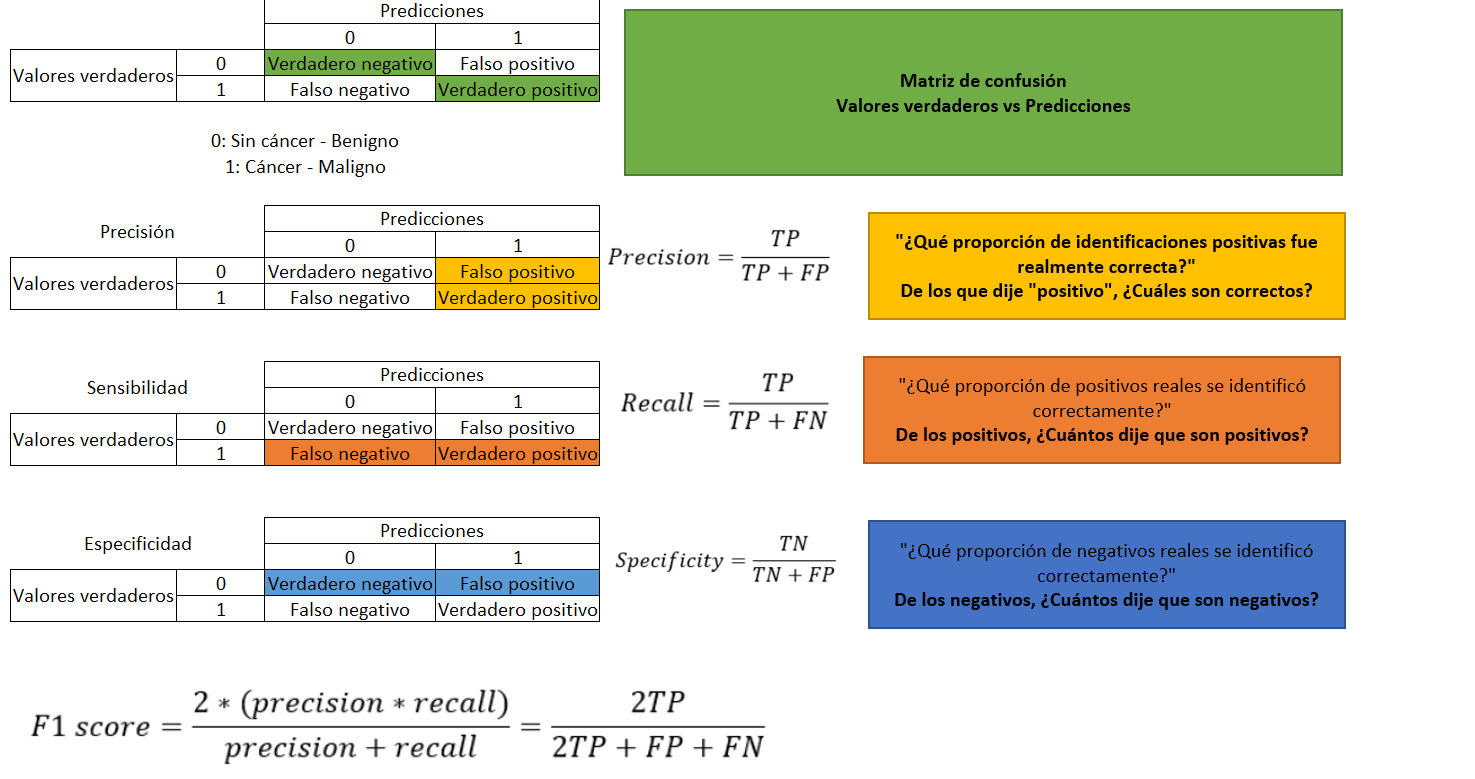

## Datos - Breast cancer wisconsin (diagnostic) dataset 

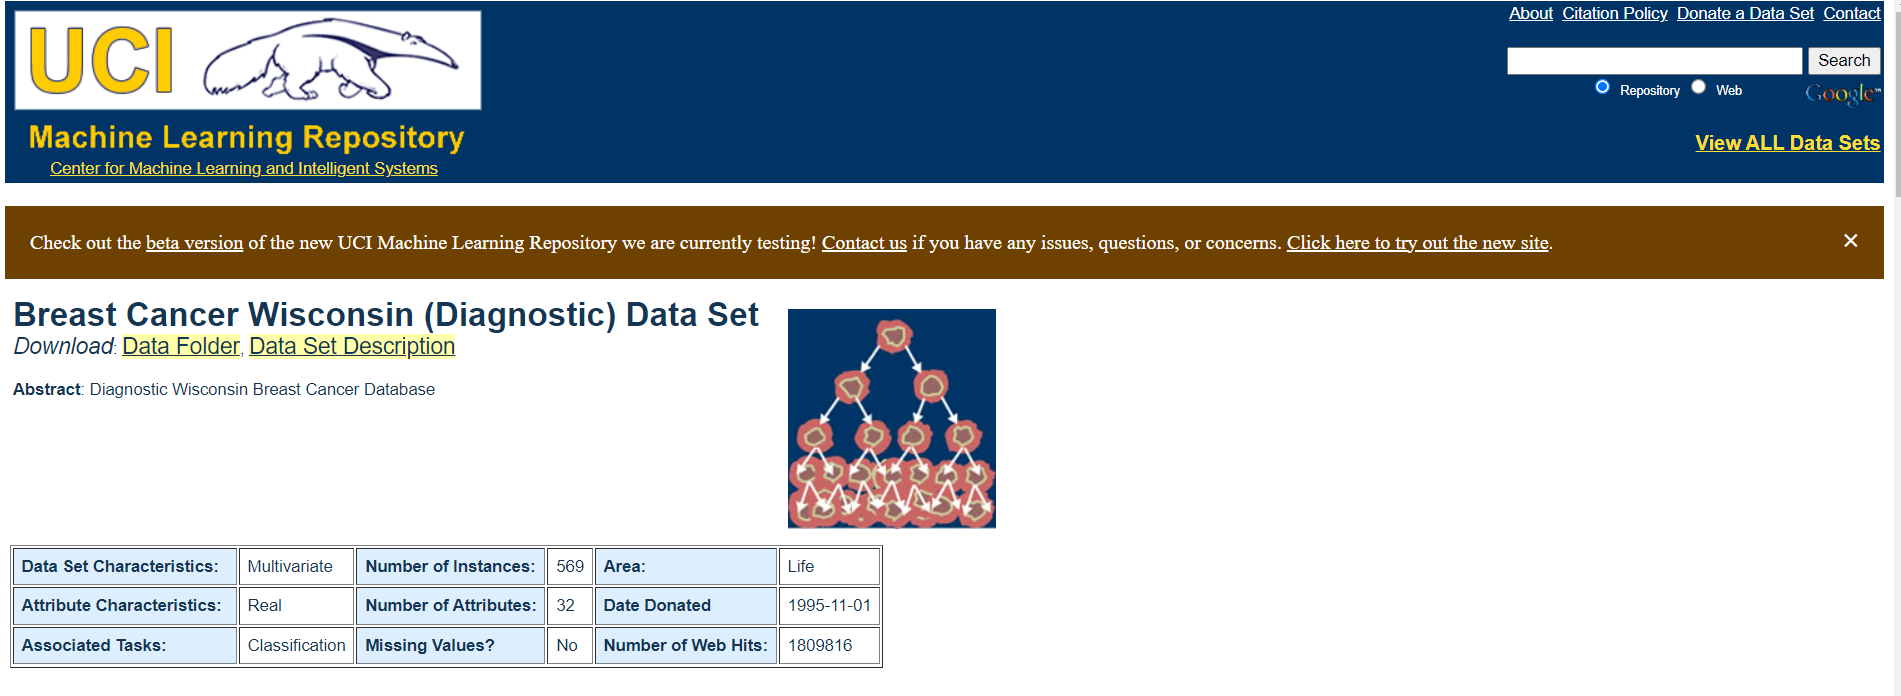

In [2]:
from sklearn import datasets
dataset = datasets.load_breast_cancer()
print('Información en el dataset:')
print(dataset.keys())

Información en el dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
#print('Características del dataset:')
#print(dataset.DESCR)

In [9]:
#dataset.data # Valores de las variables Xs
#dataset.target #Valores de la variable y: 0 ó 1 (0: Benigno 1: Maligno) 212 Malignos 357 benignos


In [46]:
X = dataset.data
y = dataset.target

In [47]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [48]:
y.sum() # 1: Benignos 

357

In [58]:
# Truco - Vamos a cambiar las Y
import numpy as np
#y = np.where(y > 0, 'Benigno', y)
#y = np.where(y == '0', 'Maligno', y)

y = np.where(y == 'Benigno', 0, y)
y = np.where(y == 'Maligno', 1, y)
y = y.astype(int)

In [60]:
y.sum() #1: maligno

212

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=23, 
                                                    stratify=y) #NUEVO

In [64]:
print('¿Cuál es el % de registros que tengo con cáncer en train?')
print(y_train.mean()*100)
print(y_train.sum())
print(y_train.size)

¿Cuál es el % de registros que tengo con cáncer en train?
37.362637362637365
170
455


In [65]:
print('¿Cuál es el % de registros que tengo con cáncer en test?')
print(y_test.mean()*100)
print(y_test.sum())
print(y_test.size)

¿Cuál es el % de registros que tengo con cáncer en test?
36.84210526315789
42
114


#### SVM

In [66]:
from sklearn.svm import SVC
algoritmo = SVC(kernel = 'linear')
algoritmo.fit(X_train, y_train)

SVC(kernel='linear')

In [67]:
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[69  3]
 [ 4 38]]


__Ustedes: ¿Cuál es la precisión, la sensibilidad y la especificidad del modelo?__

In [72]:
#Calculo la precisión del modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


accuracy = round(accuracy_score(y_test, y_pred),2)
precision = round(precision_score(y_test, y_pred),2)
recall = round(recall_score(y_test, y_pred),2)
f1score = round(f1_score(y_test, y_pred),2)

print('Accuracy del modelo:')
print(accuracy)
print('Precisión del modelo:')
print(precision)
print('Recall del modelo:')
print(recall)
print('F1score del modelo:')
print(f1score)

Accuracy del modelo:
0.94
Precisión del modelo:
0.93
Recall del modelo:
0.9
F1score del modelo:
0.92


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



<AxesSubplot:>

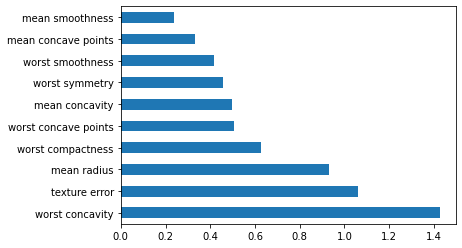

In [84]:
import pandas as pd
pd.Series(abs(algoritmo.coef_[0]), index=dataset.feature_names).nlargest(10).plot(kind='barh') #Make a horizontal bar plot.

#### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
algoritmo2 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 20)
algoritmo2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [98]:
#Realizo una predicción
y_pred = algoritmo2.predict(X_test)

In [99]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[65  7]
 [ 1 41]]


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        72
           1       0.85      0.98      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



In [94]:
algoritmo2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02390308, 0.        , 0.        , 0.        ,
       0.        , 0.00175738, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.84655568, 0.00131793, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.12646593, 0.        , 0.        ])

<AxesSubplot:>

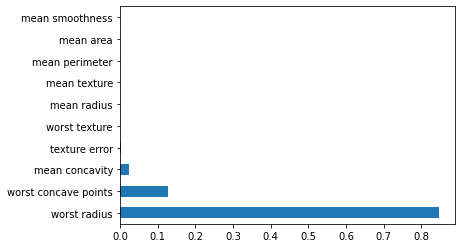

In [96]:
pd.Series(abs(algoritmo2.feature_importances_), index=dataset.feature_names).nlargest(10).plot(kind='barh') #Make a horizontal bar plot.

#### Regresión Logística

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
algoritmo3 = LogisticRegression(class_weight='balanced')
algoritmo3.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [104]:
#Realizo una predicción
y_pred = algoritmo3.predict(X_test)

In [105]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[67  5]
 [ 5 37]]


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        72
           1       0.88      0.88      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



# Tarea 
### ¿Cómo calcular la importancia de variables en una regresión logística? 
### ¿Qué significa "coef" en una regresión logística"? 

In [108]:
algoritmo3.coef_

array([[-1.07154115, -0.38231767, -0.28542948,  0.01334767,  0.04931235,
         0.19087707,  0.269109  ,  0.12041399,  0.03437792,  0.01130849,
        -0.06066874, -0.53909886, -0.29174174,  0.14222824,  0.00292568,
         0.03430126,  0.0501074 ,  0.01253696,  0.0034143 ,  0.00303634,
        -1.24486034,  0.49337028,  0.27670397,  0.01857421,  0.08898804,
         0.62265633,  0.79441232,  0.23114235,  0.10532732,  0.06287953]])